<a href="https://colab.research.google.com/github/Bilal-Moussaoui/Data_Science_Basics_PY/blob/main/Lesson_1_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 1: Regresión Lineal
Objetivos de la sesión:
1. Entender lo que busca la regresión lineal
2. Derivar su formulación matemàtica (función de costes y gradiente)
3. Implementación con Python usando NumPy.
4. Verificación comparando el resultado con scikit-learn (Hay alternativas como Pytorch y Keras)
5. Ejemplo pràctico con Kaggle

<br>

## What is a Linear Regression?
The intuition of lineal regression is that we want to predict a continuous variable (a numerical variable that can take infinitely many values within a range, so a real number rather than an integer) from one or more features: $x_1, x_2, ... x_n$.

> **Example:**  
> `price = 30000 + 50 * (square meters) + 10000 * (rooms)`

In general:
$$ y = w_0 + w_1*x_1 + w_2*x_2 + ... + w_n*x_n $$

The last notation can also be considered as a vector form:
$$ y^​=Xw $$

where

* X: feature matrix (𝑚×𝑛)
* w: parameter vector (𝑛×1)
* y: predicted values

<br>

**Finally, to sum-up. Given some data that you think are related... Linear regression:**
1. Quantifies the relationshipo in the data (this is $R^2$)
    1. First of all we use least-squares to fit a line to the data.
    2. We calculate $R^2$ using the variance to the mean and the variace to the fit line. (Needs to state that most of the variance from the y variable is explanined by the x variable!)
    3. We calculate a p-value for $R^2$ to evaluate its reliablitity.
1. Determines how reliable that relationship is (this is the p-value that we calculate with F).
    1. Needs to be small.

Video: https://www.youtube.com/watch?v=2AQKmw14mHM&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU

>Take into account: Both SSR and MSE measure the same concept and can be considered as Loss Functions, but MSE is just a normalized, numerically safer, and theoretically cleaner version. (Instead of measuring the total residuals of the dataset, MSE represents the average error per observation. We gain independency and the Gradinet Descent will be mroe consistent).
>
>Also, MSE has the same unit squared as the target variable y.
>If you later take the square root (→ Root Mean Squared Error, RMSE), you get an error in the same units as your prediction target, which is intuitive.
>
>Example:
>If you’re predicting house prices in euros:
>
>MSE = $2.5 \times 10^{10} \text{ euros}^2$
>
>RMSE = €158,000 → “On average, my predictions are off by €158,000.”
>
>With SSR alone, the magnitude doesn’t carry intuitive meaning.

<br>

## Intuition of Cost Function
### Cost Function: Mean Squared Error (MSE)
We want our predictions $\hat{y}$ to be as close as possible to the real values $y$.  
In other words, we are looking for a line that **minimizes the Mean Squared Error (MSE)**.  
As stated, we need to measure the error using the MSE, which will serve as our **cost function**.  
In the next step, we will see how to minimize it.

$$
J(w) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2
$$


<br>

## Intuition of Gradient Descent (Optimization Algorithm)

When we fit a line with **Linear Regression**, we optimize the **Intercept** (the value where the line crosses the y-axis, i.e., when all the features are 0) and the **Slope** (the inclination of the line).

We can find a similar idea of optimization when using **Logistic Regression** (the “S-shaped curve”) and **t-SNE** (which optimizes clusters).

<br>

### Least Squares vs. Gradient Descent

- **Least Squares** → elegant, closed-form, small-scale solution.  
  It requires computing the **inverse matrix**, which is computationally expensive and may be numerically unstable.
- **Gradient Descent** → general-purpose, scalable, and essential for modern ML.  
  It can be used on datasets with a large number of features.

<br>

### Why it’s called *Gradient Descent*

It’s called **Gradient Descent** because when we try to find the optimal intercept and slope, we can imagine a **three-dimensional surface** representing the loss function, and we move *down the gradient* (the slope of that surface) until reaching the minimum.

<br>


### Steps to Remember

1. Take the **derivative** of the **Loss Function** for each parameter.  
   In ML terms, this is called taking the **Gradient** of the Loss Function.
2. Pick random initial values for the parameters.
3. Plug the parameter values into the derivatives (i.e., compute the Gradient).
4. Calculate the **Step Size**: $\text{Step Size} = \text{Slope} \times \text{Learning Rate}$
5. Update the parameters: $\text{New Parameter} = \text{Old Parameter} - \text{Step Size}$
6. Repeat from Step 3 until the **Step Size** is very small (below a threshold)  
   or until you reach the **Maximum Number of Steps**.

<br>

### When to Use Stochastic Gradient Descent (SGD)

If we are working with a dataset containing millions of data points, it can take a long time for the algorithm to converge.  
To speed it up, we can use **Stochastic Gradient Descent (SGD)**, which uses a *randomly selected subset* (mini-batch) of the data at each step instead of the full dataset.  
This reduces the time spent computing the derivatives of the **Loss Function**.

>💡 **Key idea:**  
>Gradient Descent iteratively updates the model parameters in the opposite direction of the gradient of the cost function, gradually reducing the error until convergence.

In [ ]:
# Primera puesta en acción de Regresión Lineal.

import numpy as np

# Synthetic data for now
np.random.seed(42)
X = 2 * np.random.rand(100, 1)            # El slope (bias) que tenemos de momento
y = 4 + 3 * X + np.random.randn(100, 1)   # y = 4 + 3x + noise {In order to let y be explained by x but not entirely} - The real value.

# Add bias column
X_b = np.c_[np.ones((100, 1)), X] # Estamos creando concatendando una matriz [100 x 1] con la matriz X [100 x 1] ya que solo tenemos un bias (un slope)

# Hyperparameters
alpha = 0.1                       # Learning rate, from now won't be scheduled (scheduled implies tunning: alpha goes from higher value to a lower value)
n_iterations = 10000              # The maximum number of iterations
m = len(X_b)                      # Number of samples

tolerance = 1e-6                  # Tolerance (ε)
theta = np.random.randn(2, 1)     # θ = Step size
prev_cost = float('inf')            # Has to be a big integer to ensure ∣J(w(t+1))−J(w(t))∣<ε for the first iteration

for iteration in range(n_iterations):
  gradients = (1/m)*X_b.T.dot(X_b.dot(theta) - y) # X_b.dot(theta): The predicted value. X_b.dot(theta) - y => The residual.
  theta = theta - alpha * gradients

  cost = (1/(2*m)) * np.sum((X_b.dot(theta) - y)**2)
  # 2nd Stop condition
  if abs(prev_cost - cost) < tolerance:
    print(f"Converged after {iteration} iterations")
    break
  prev_cost = cost

print("Final theta:\n", theta)


Converged after 281 iterations
Final theta:
 [[4.20141318]
 [2.78219471]]


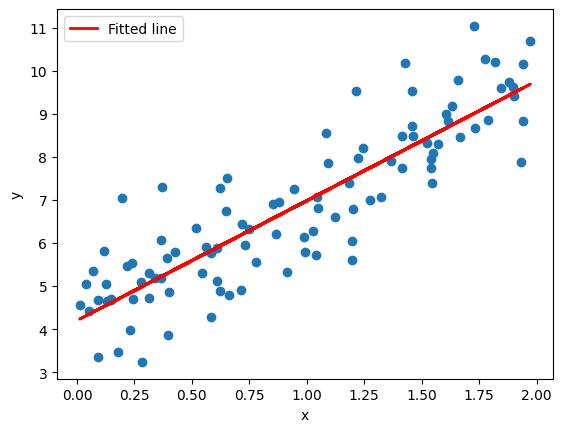

In [ ]:
# Now that we have calculated the intercept and slope (theta), we can display all the data and fitted line:
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=1)
plt.plot(X, X_b.dot(theta), color="red", linewidth=2, label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# R^2 evaluation and p-value for reliability
# R^2 is equal to 1 - (SSR / SST)

from sklearn.metrics import r2_score
# y: true values, y_pred: predicted
y_pred = X_b.dot(theta) # theta: [w0, w1], so we got the intercept and slope for the most fitted line

# Manual computation
SS_res = np.sum((y - y_pred)**2)
SS_tot = np.sum((y - np.mean(y))**2)
r2_manual = 1 - (SS_res / SS_tot)

# Or with sckit-learn:
r2_sklearn = r2_score(y, y_pred)

print(f"R^2 (manual): {r2_manual:.4f}")
print(f"R^2 (sklearn): {r2_sklearn:.4f}")

# Due to the noise that we added in the synthetic creation of the points we don't achieve a R^2 of 1: The y variable can not be fully (1) explaned by the x variable.


R^2 (manual): 0.7693
R^2 (sklearn): 0.7693


In [ ]:
from re import S
# To do stadistical interferce we need statsmodels library:
import statsmodels.api as sm

# X: features, add constant for intercept
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     326.7
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           5.66e-33
Time:                        14:18:29   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2151      0.170     24.753      0.0

## Kaggle Dataset Linear Regression Use-Case
### House Prices - Advanced Regression Techniques

In [ ]:
# 1. Importación
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skmodels

# 2. Cargar del training dataset:
data = pd.read_csv("/content/sample_data/house_price_train.csv")

# 3. Selección de columnas simples
X_1 = data[['GrLivArea']].values
X_2 = np.random.randn(len(X_1), 1)
X = np.c_[X_1, X_2]
y = data[['SalePrice']].values

# # Plot para confirmar que se ha cargado bien
# plt.scatter(X, y, alpha=1)
# plt.xlabel("GrLivArea")
# plt.ylabel("SalePrice")
# plt.show()

# 4. Modelo
lin_reg = skmodels.LinearRegression()
lin_reg.fit(X, y)

# # 5. Visualización
# plt.scatter(X, y, alpha=0.3)
# plt.plot(X, lin_reg.predict(X), color='red')
# plt.xlabel("GrLivArea")
# plt.ylabel("SalePrice")
# plt.show()

# 6. Cálculo de R^2 (determinar que tanto explica GrLivArea de SalePrice):
r2_sklearn = r2_score(y, lin_reg.predict(X))
print(f"R^2 (sklearn): {r2_sklearn:.4f}")


R^2 (sklearn): 0.5022


### Ejercicio normalizando la columna

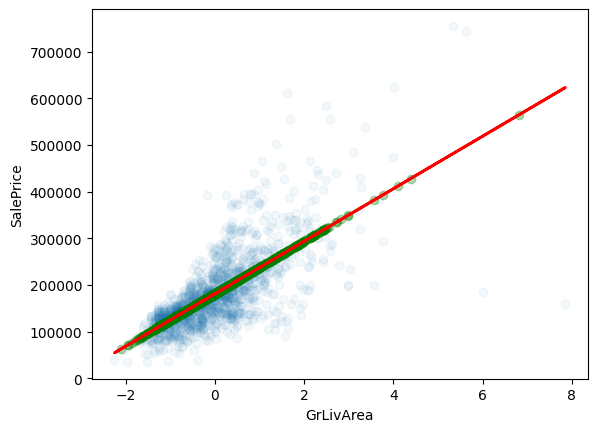

R² after scaling: 0.5021


In [ ]:
# 1. Importación
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skmodels
from sklearn.preprocessing import StandardScaler

# 2. Cargar del training dataset:
data = pd.read_csv("/content/sample_data/house_price_train.csv")
data_test = pd.read_csv("/content/sample_data/house_price_test.csv")

# 3. Selección de columnas simples
X_1 = data[['GrLivArea']].values
y = data[['SalePrice']].values

scaler = StandardScaler()
X_1_scaled = scaler.fit_transform(X_1)
X_test_scaled = scaler.transform(data_test[['GrLivArea']].values)


lin_reg = skmodels.LinearRegression()
lin_reg.fit(X_1_scaled, y)
y_pred_test = lin_reg.predict(X_test_scaled)

# Plot para confirmar que se ha cargado bien
plt.scatter(X_1_scaled, y, alpha=0.05)
plt.plot(X_1_scaled, lin_reg.predict(X_1_scaled), color="red", linewidth=2, label="Fitted line")
plt.scatter(X_test_scaled, y_pred_test, alpha=0.3, color="green")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

# 6. Cálculo de R^2 (determinar que tanto explica GrLivArea de SalePrice):
r2_scaled = r2_score(y, lin_reg.predict(X_1_scaled))
print(f"R² after scaling: {r2_scaled:.4f}")

# Store the results
submission = pd.DataFrame({
    "Id": data_test["Id"],
    "SalePrice": y_pred_test.flatten()
})
submission.to_csv("/content/sample_data/house_price_submission.csv", index=False)
